# Importing Library

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pathlib
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Activation
from keras.layers.convolutional import Convolution2D, MaxPooling2D

# Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('drive/')

Mounted at drive/


# Preprocessing Data

In [ ]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# The validation data should not be augmented
validate_datagen = ImageDataGenerator( rescale = 1.0/255. )

In [ ]:
# Generating Directory for Data

train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/Machine Learning/Face Detector (BANGKIT 2021 CAPSTONE)/facemask_dataset/train',
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    shuffle=True)

validate_generator = validate_datagen.flow_from_directory('/content/drive/MyDrive/Machine Learning/Face Detector (BANGKIT 2021 CAPSTONE)/facemask_dataset/validation',
                                                  target_size=(224, 224),
                                                  batch_size=32,
                                                  class_mode='categorical',
                                                  shuffle=True)

Found 6062 images belonging to 2 classes.
Found 1511 images belonging to 2 classes.


# Building Model (CNN)

In [ ]:
# Creating a Sequential Model and Adding The Layers

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='softmax')                           
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 86528)             0

In [ ]:
# Compiling Model

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Training Data

In [ ]:
# Fitting Model
 
history = model.fit(
      train_generator,
      epochs=20,
      validation_data=validate_generator,
      validation_steps=20,
    )

Epoch 1/20
 90/190 [=============>................] - ETA: 12:28 - loss: 1.1409 - accuracy: 0.5510

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


190/190 [==============================] - 1551s 8s/step - loss: 0.8758 - accuracy: 0.6183 - val_loss: 0.3561 - val_accuracy: 0.8734
Epoch 2/20
190/190 [==============================] - 926s 5s/step - loss: 0.4641 - accuracy: 0.8030 - val_loss: 0.3814 - val_accuracy: 0.8469
Epoch 3/20
190/190 [==============================] - 888s 5s/step - loss: 0.3803 - accuracy: 0.8434 - val_loss: 0.3283 - val_accuracy: 0.8781
Epoch 4/20
190/190 [==============================] - 867s 5s/step - loss: 0.4034 - accuracy: 0.8331 - val_loss: 0.3807 - val_accuracy: 0.8687
Epoch 5/20
190/190 [==============================] - 868s 5s/step - loss: 0.3754 - accuracy: 0.8386 - val_loss: 0.3986 - val_accuracy: 0.8531
Epoch 6/20
190/190 [==============================] - 855s 4s/step - loss: 0.3589 - accuracy: 0.8489 - val_loss: 0.3109 - val_accuracy: 0.8781
Epoch 7/20
190/190 [==============================] - 855s 4s/step - loss: 0.3320 - accuracy: 0.8569 - val_loss: 0.2582 - val_accuracy: 0.8875
Epoch 8/2

# Evaluating Accuracy and Loss for the Model

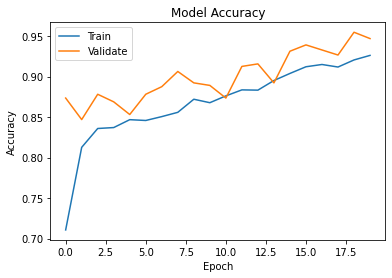

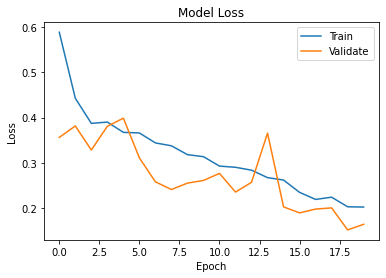

In [ ]:
# Displaying Model Training History and Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy').set_color('Black')
plt.ylabel('Accuracy').set_color('Black')
plt.xlabel('Epoch').set_color('Black')
plt.legend(['Train', 'Validate'], loc='best')
plt.show()

# Summarizing history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss').set_color('Black')
plt.ylabel('Loss').set_color('Black')
plt.xlabel('Epoch').set_color('Black')
plt.legend(['Train', 'Validate'], loc='best')
plt.show()

# Saving Model (.h5)

In [ ]:
model.save("mask_detector.model", save_format="h5")

# Generating a SavedModel

In [ ]:
export_dir = 'saved_model/1'
tf.saved_model.save(model, export_dir)

INFO:tensorflow:Assets written to: saved_model/1/assets


# Converting The SavedModel to TFLite

In [ ]:
# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [ ]:
# Save The Model
tflite_model_file = pathlib.Path('mask_detector_model.tflite')
tflite_model_file.write_bytes(tflite_model)

22605424

# Downloading The TFLite Model

In [18]:
try:
    from google.colab import files
    files.download(tflite_model_file)
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>